In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 讀取資料
data = pd.read_csv("diet_data_cleaned.csv")

In [25]:
print(data.head())
print(data.info())
print(data.describe())
print(data.shape)

        ID  Stewed  Prune  Dried  Mixed  Apple  Banana  Berry  Cherry  \
0  1000054     0.0    0.0    0.0    0.0    0.0     1.0    0.5     0.0   
1  1000142     0.0    0.0    0.0    0.0    0.0     0.0    0.0     0.0   
2  1000208     0.0    0.0    0.0    0.0    0.0     0.0    0.0     0.0   
3  1000259     0.0    0.0    0.0    0.0    1.0     1.0    0.0     0.0   
4  1000267     0.0    0.0    0.0    0.0    1.0     1.0    0.0     0.0   

   Grapefruit  ...  Pea  Sweetpepper  Spinach  Sprouts  Sweetcorn  \
0         0.0  ...  0.0          0.0      0.0      0.0        0.0   
1         0.0  ...  0.0          0.0      0.0      0.0        0.0   
2         0.0  ...  0.0          0.0      0.0      0.0        0.0   
3         0.0  ...  0.0          0.0      0.0      0.0        0.0   
4         0.0  ...  0.0          0.0      0.0      0.0        0.0   

   Freshtomato  Tinnedtomato  Turnip_swede  Watercress  Othervegetables  
0          0.0           0.0           0.0         0.0              0.0 

In [26]:
# 計算非零值的數量
non_zero_count = (data != 0).sum().sum()

# 總元素數量
total_elements = data.size

# 計算稀疏性
sparsity = 1 - (non_zero_count / total_elements)

print(f"Dataset Sparsity: {sparsity:.2%}")

Dataset Sparsity: 87.95%


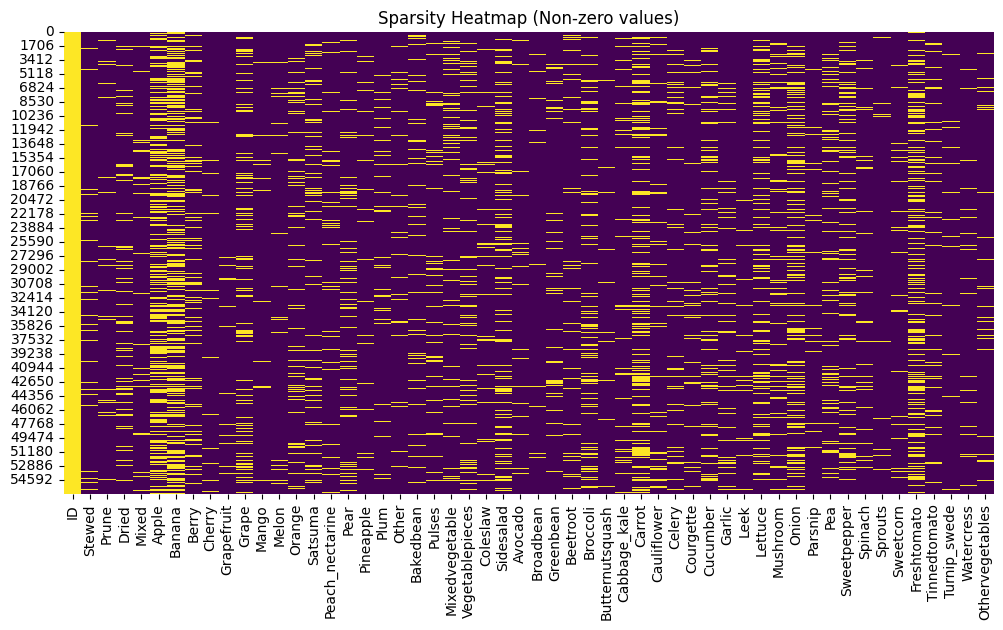

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(data != 0, cbar=False, cmap='viridis')
plt.title("Sparsity Heatmap (Non-zero values)")
plt.show()

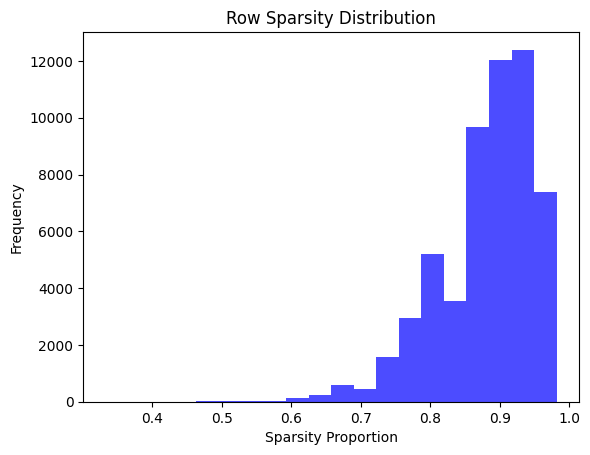

In [28]:
row_sparsity = (data == 0).sum(axis=1) / data.shape[1]  # 每行稀疏比例
plt.hist(row_sparsity, bins=20, color='blue', alpha=0.7)
plt.title("Row Sparsity Distribution")
plt.xlabel("Sparsity Proportion")
plt.ylabel("Frequency")
plt.show()

In [32]:
# 計算稀疏比例
row_sparsity = (data == 0).sum(axis=1) / data.shape[1]

# 按稀疏比例分組計數
sparsity_distribution = row_sparsity.value_counts(bins=10).sort_index()  # 分組分佈

# 驗證 Y 軸總和
print(f"Y 軸總和: {sparsity_distribution.sum()}")
print(f"總行數: {data.shape[0]}")

Y 軸總和: 56281
總行數: 56281


In [30]:
print(f"Max sparsity: {row_sparsity.max():.2%}")
print(f"Min sparsity: {row_sparsity.min():.2%}")
print(f"Average sparsity: {row_sparsity.mean():.2%}")

Max sparsity: 98.15%
Min sparsity: 33.33%
Average sparsity: 87.95%


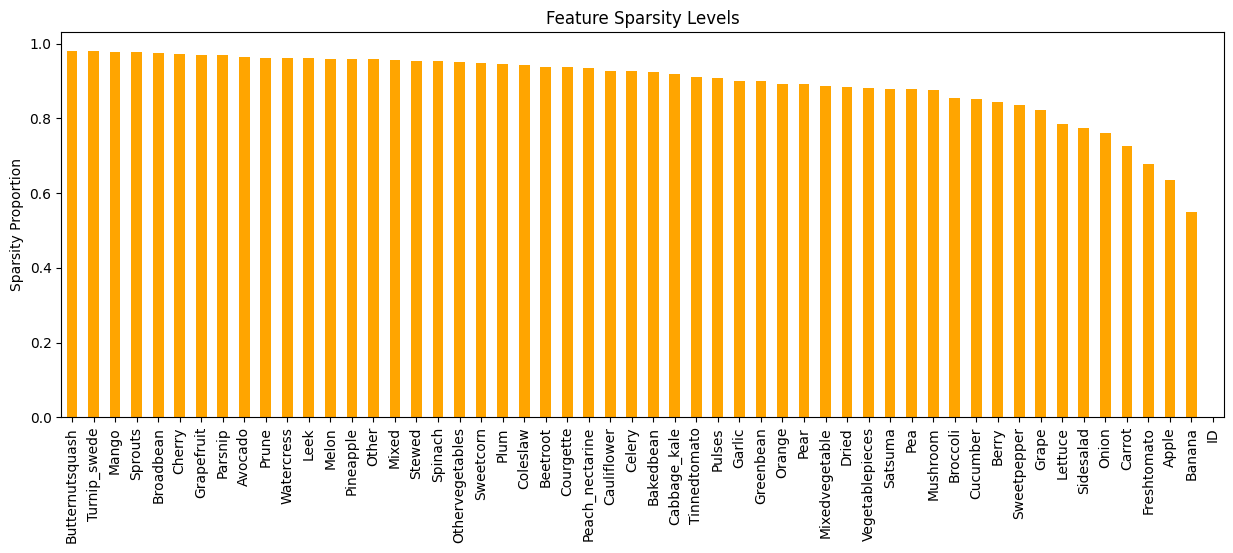

In [31]:
feature_sparsity = (data == 0).sum(axis=0) / data.shape[0]  # 每列稀疏比例
feature_sparsity.sort_values(ascending=False).plot(kind='bar', figsize=(15, 5), color='orange')
plt.title("Feature Sparsity Levels")
plt.ylabel("Sparsity Proportion")
plt.show()

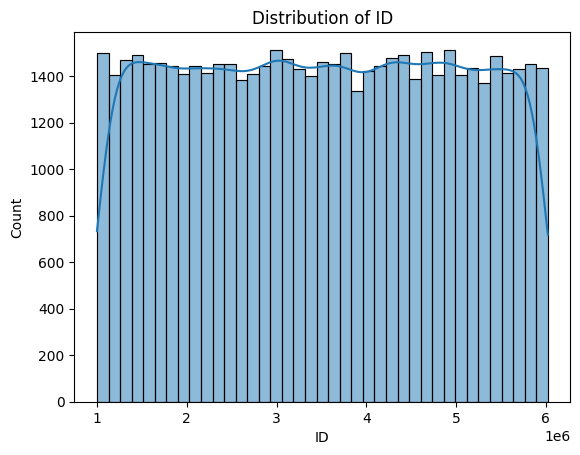

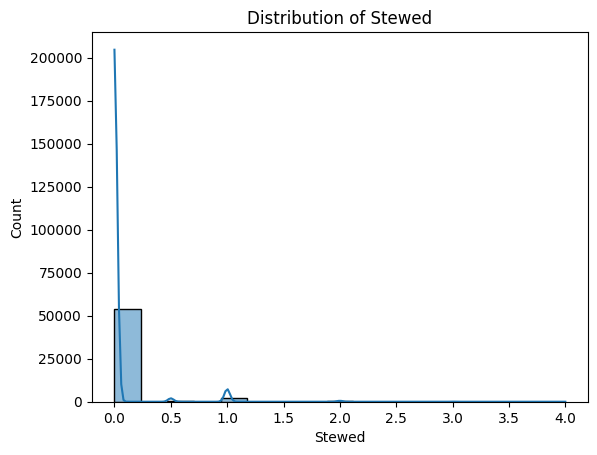

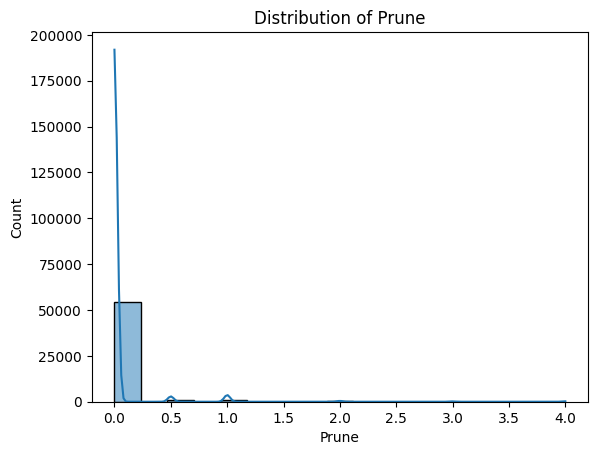

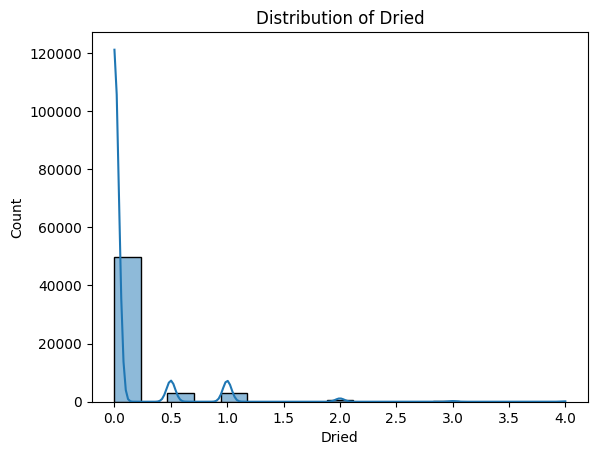

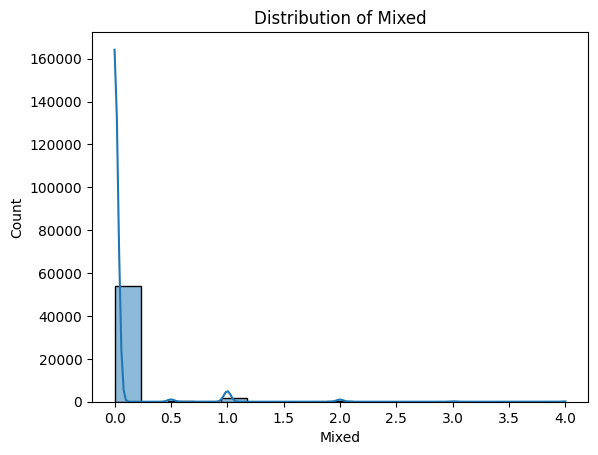

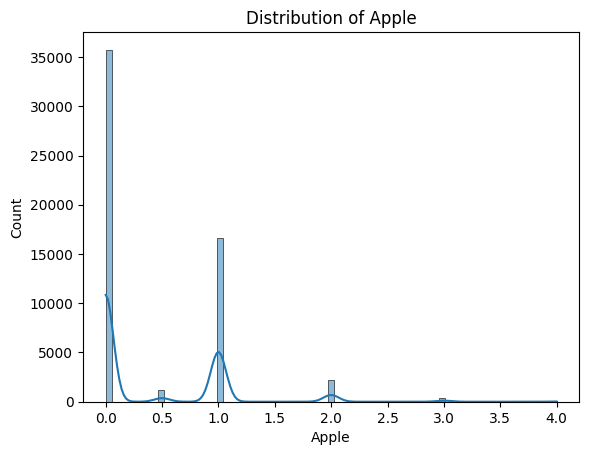

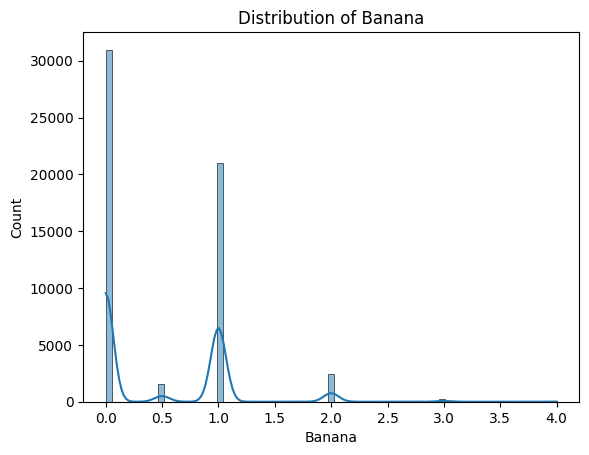

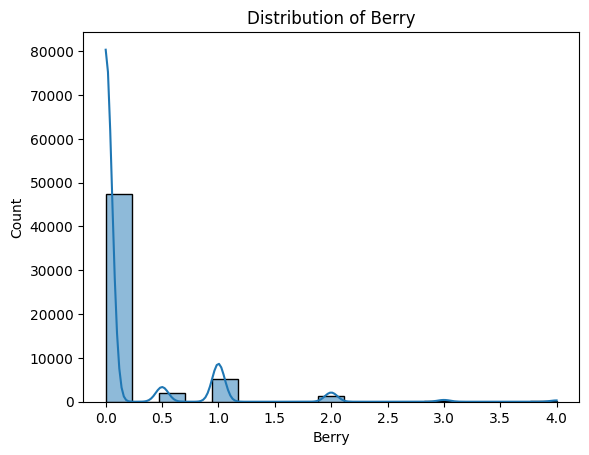

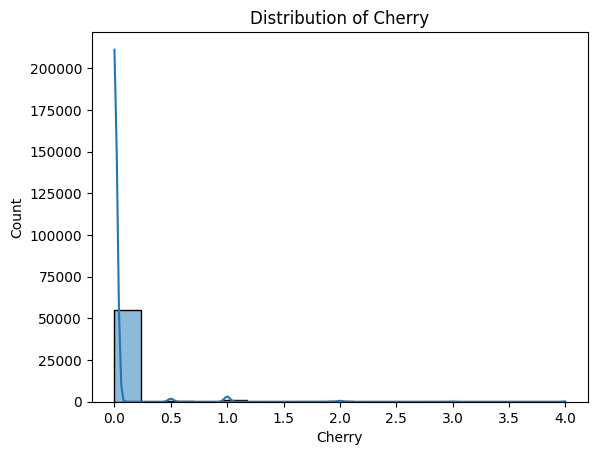

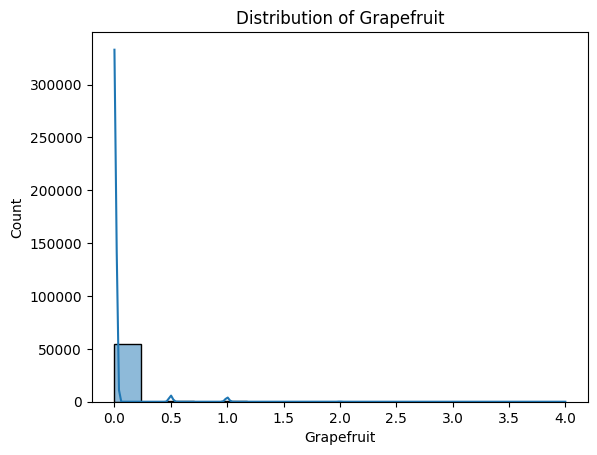

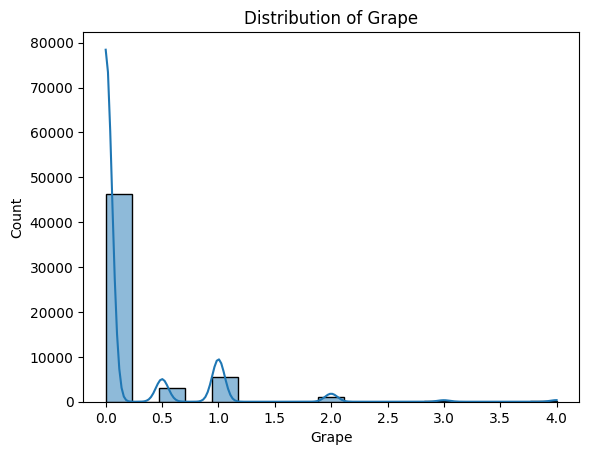

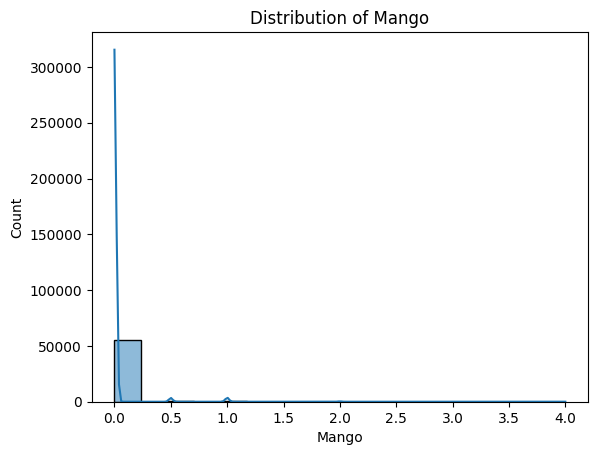

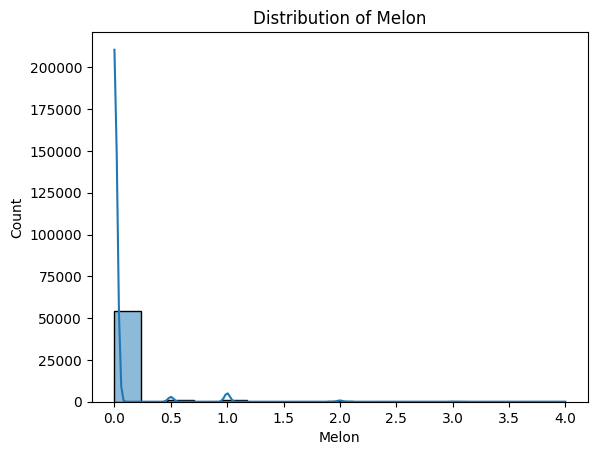

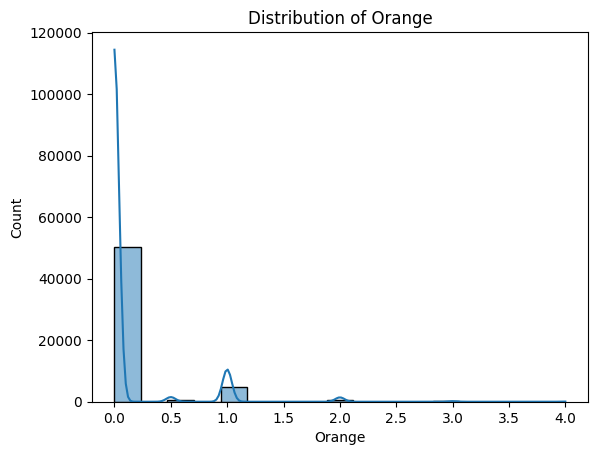

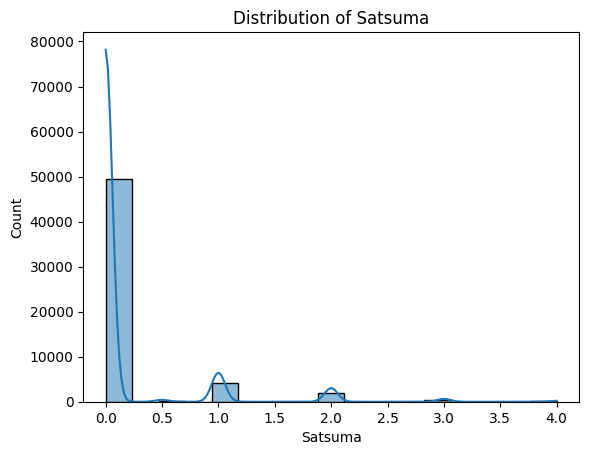

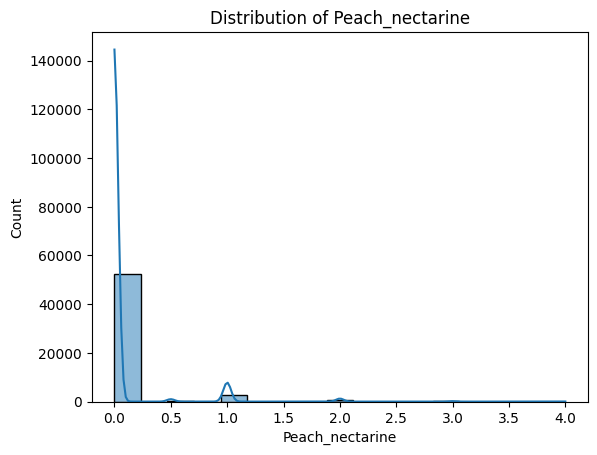

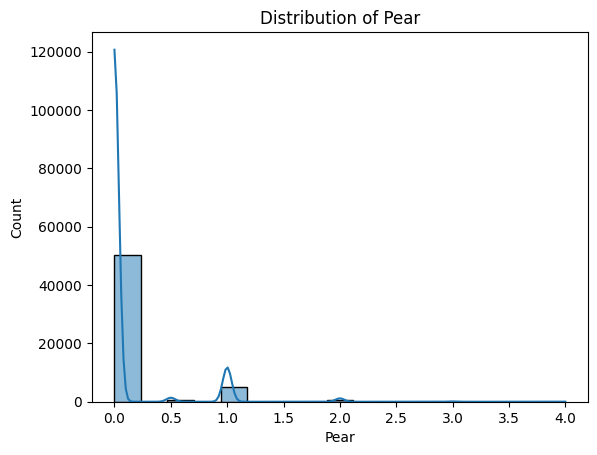

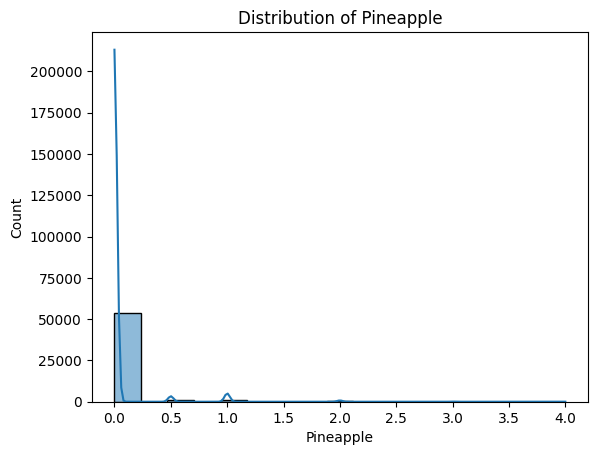

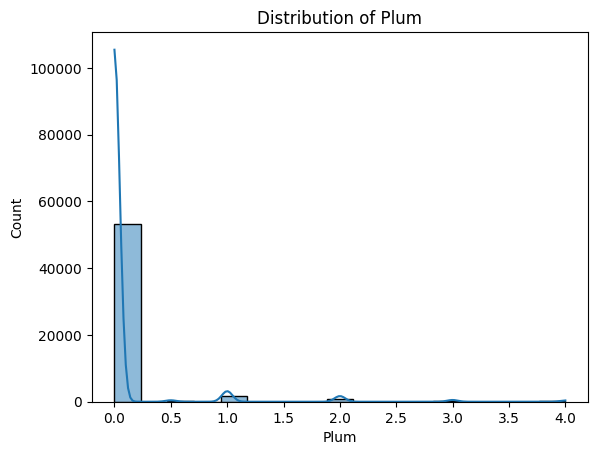

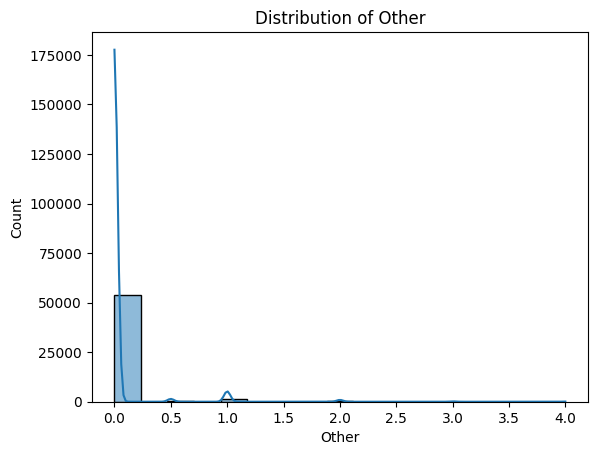

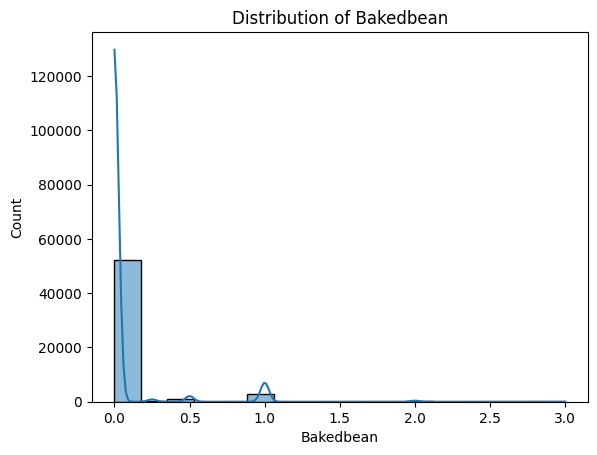

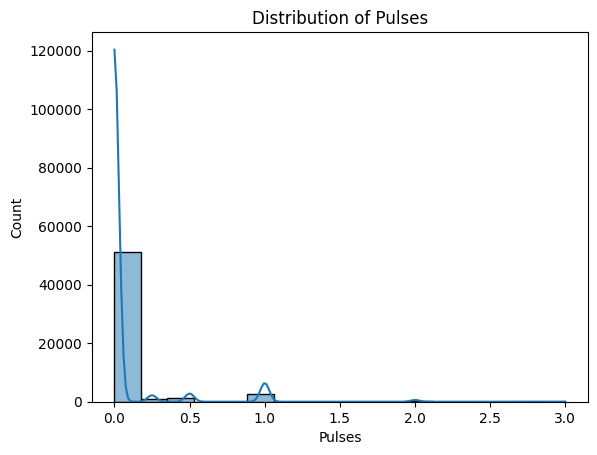

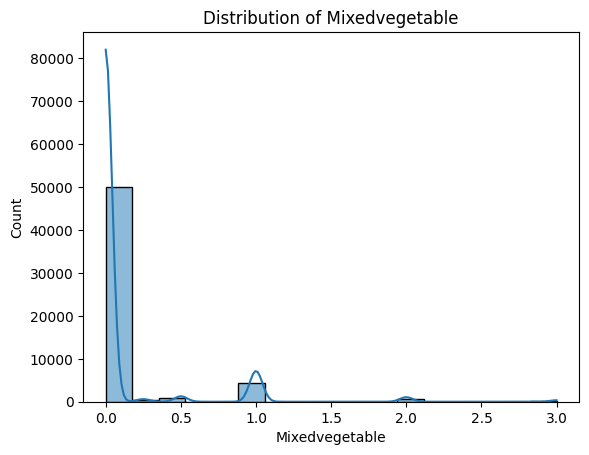

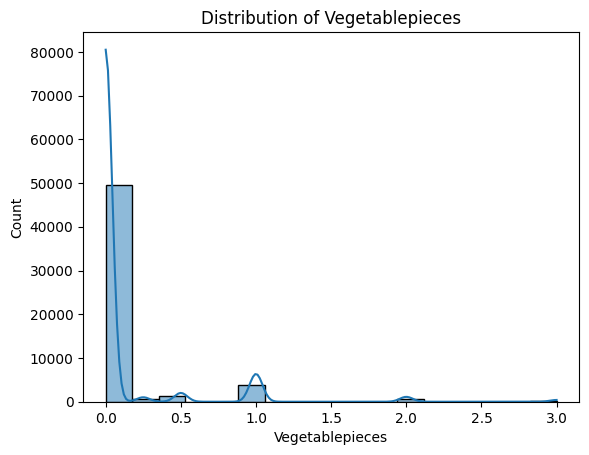

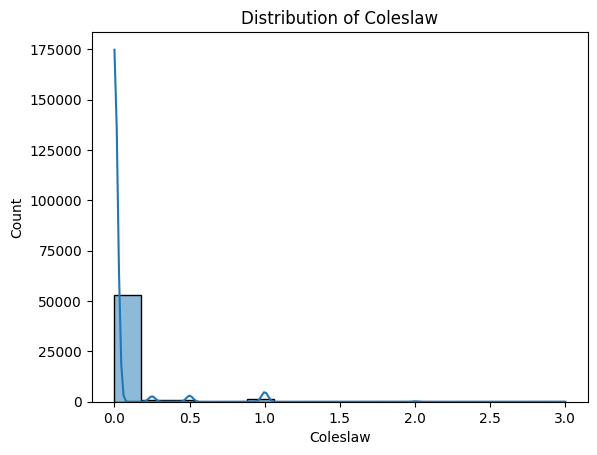

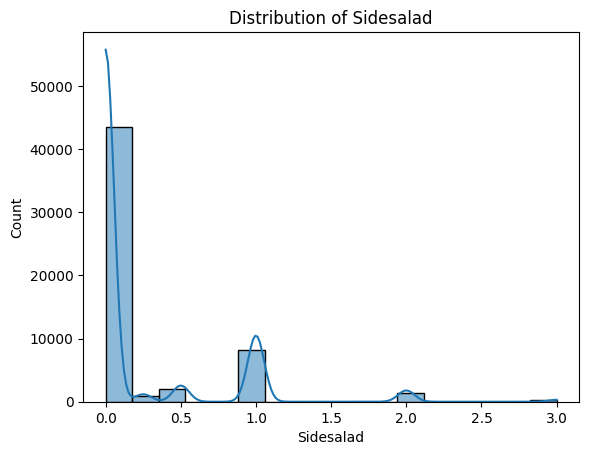

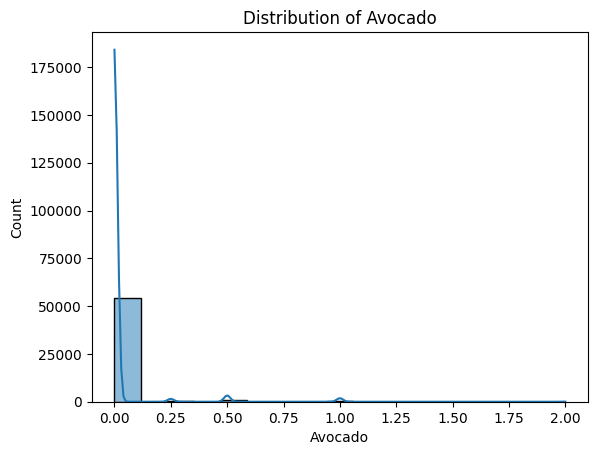

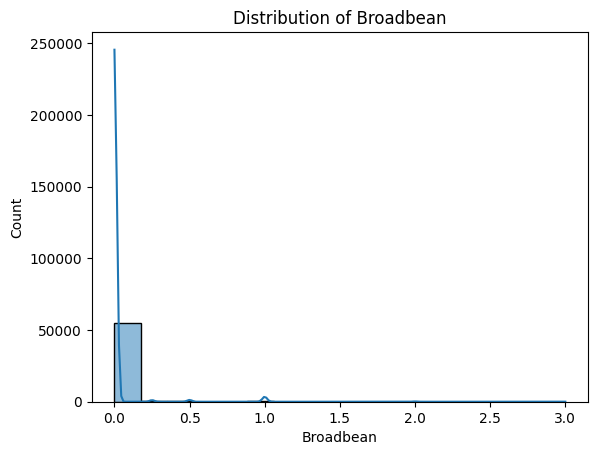

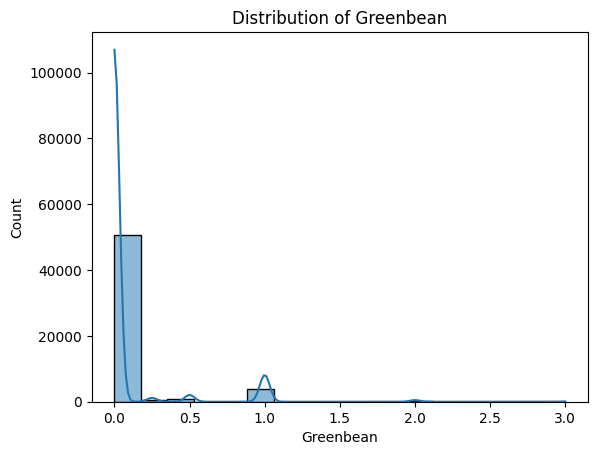

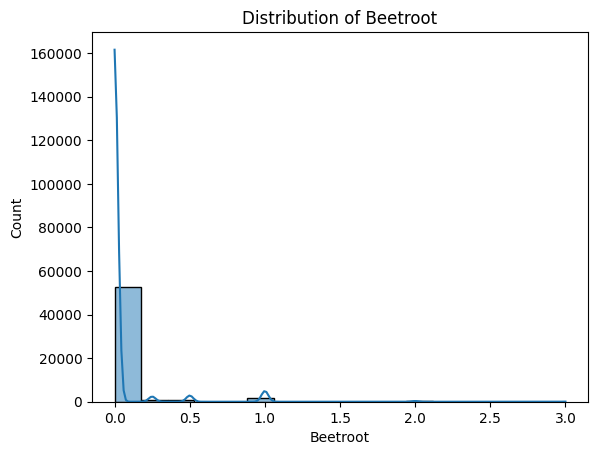

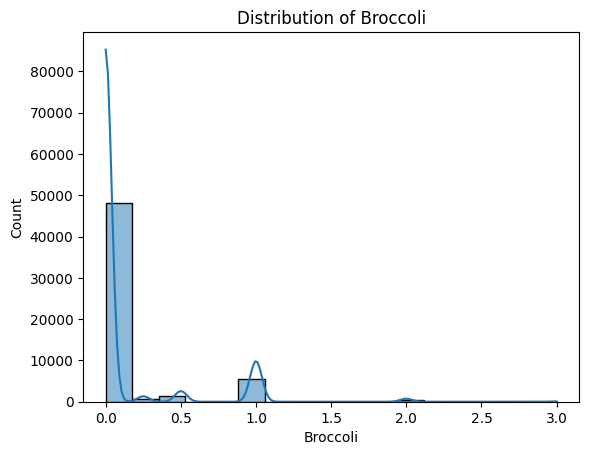

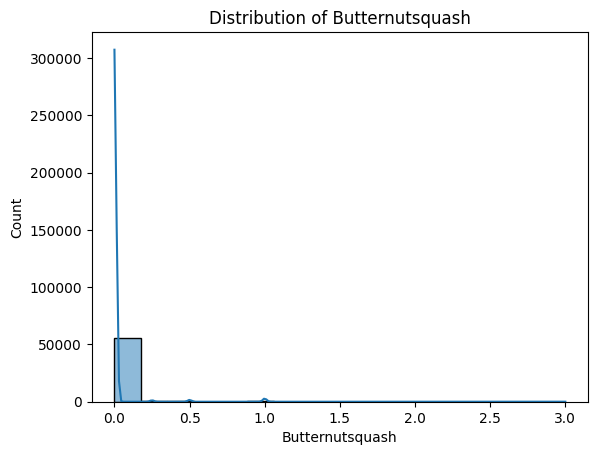

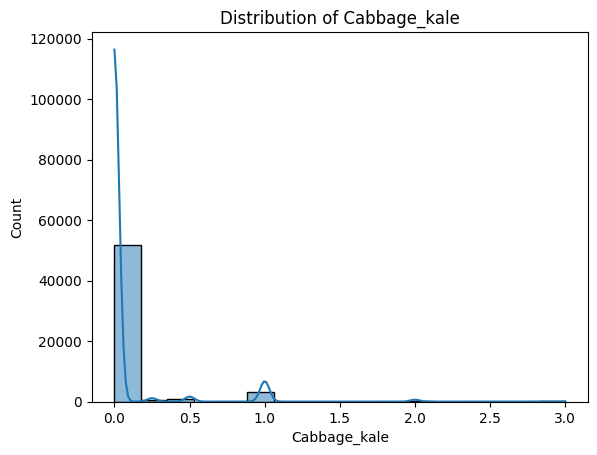

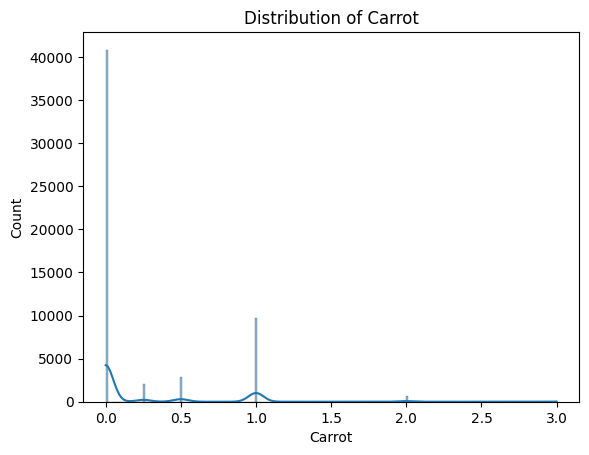

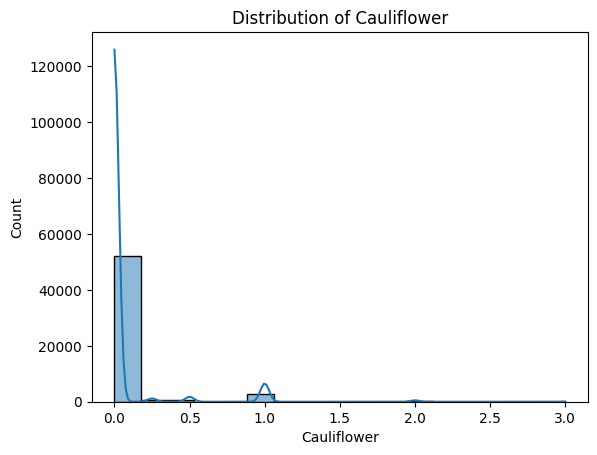

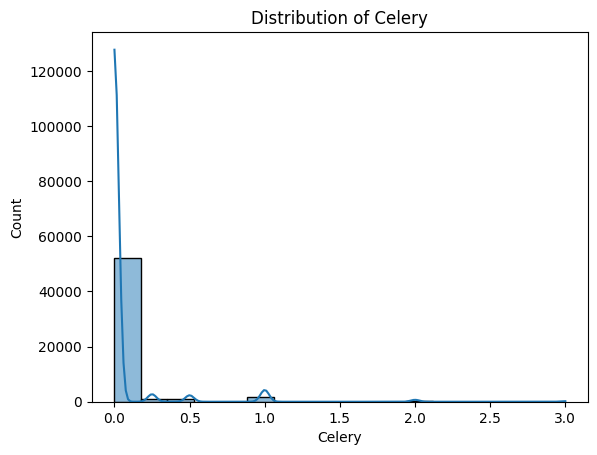

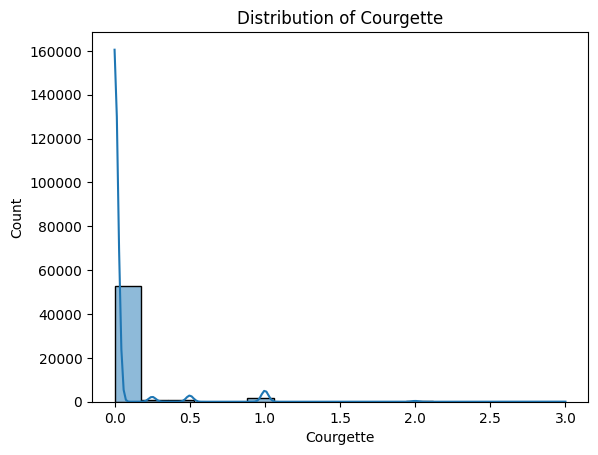

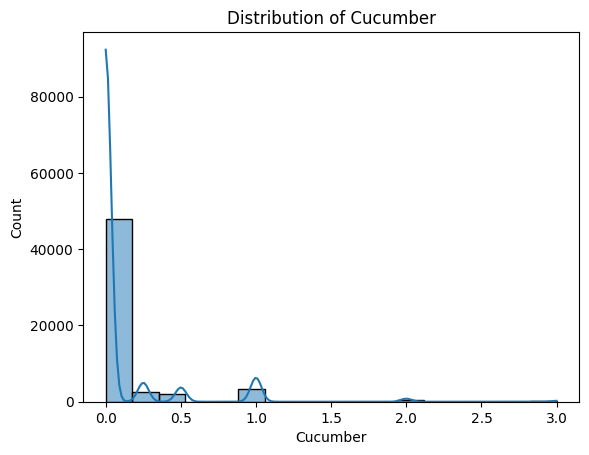

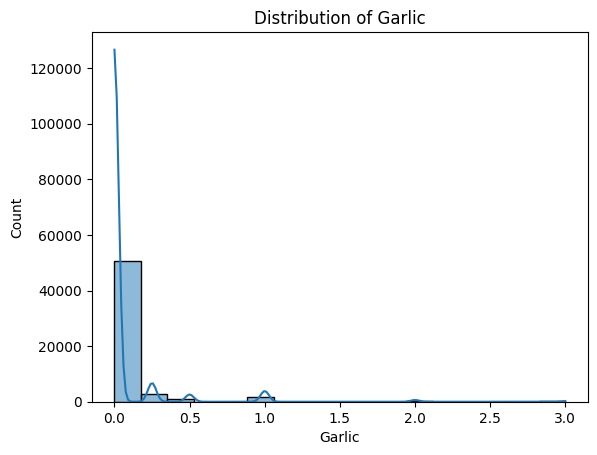

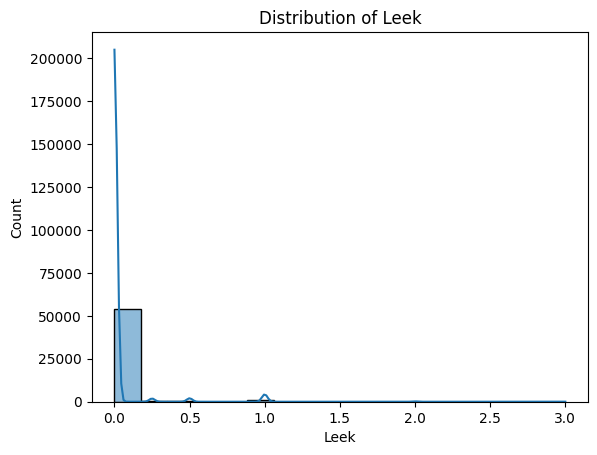

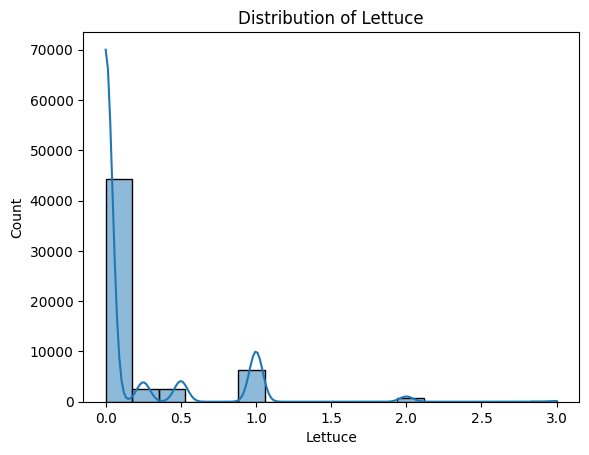

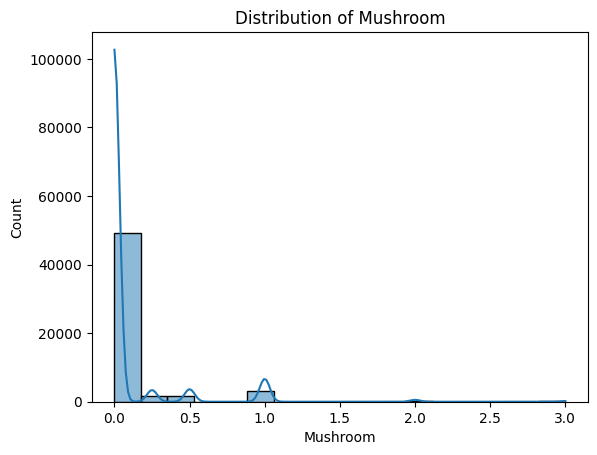

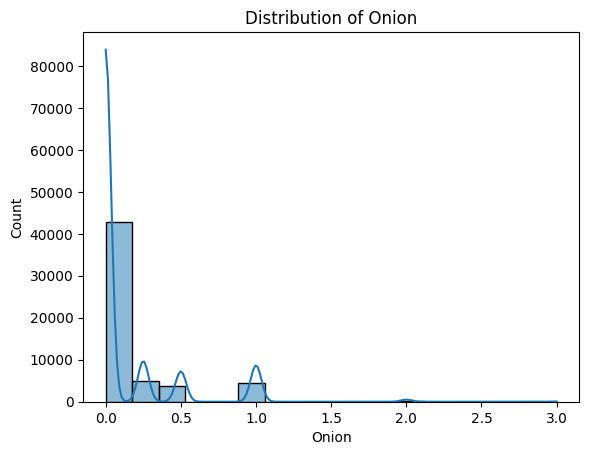

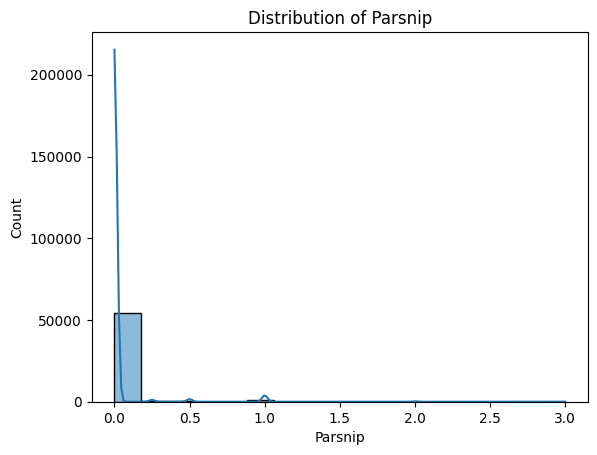

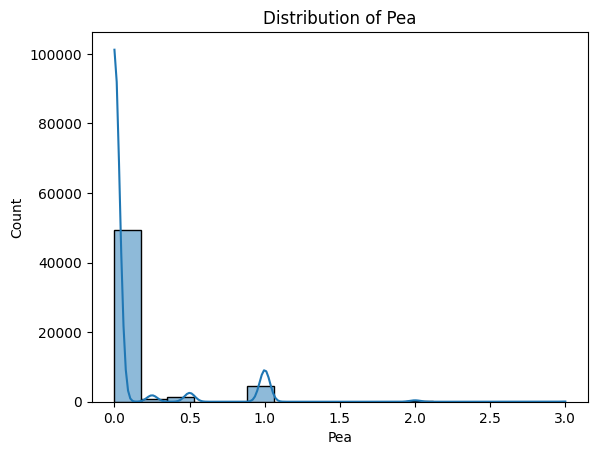

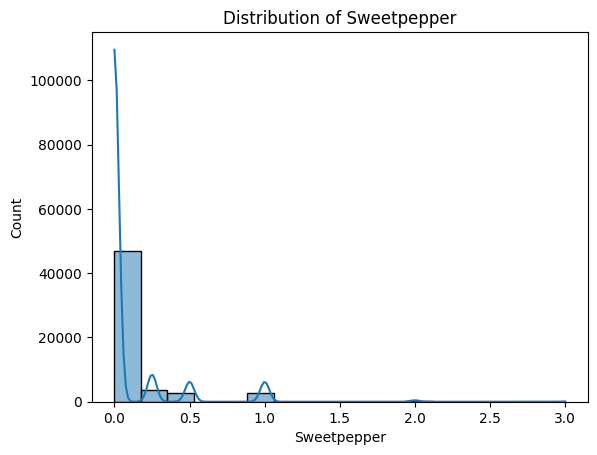

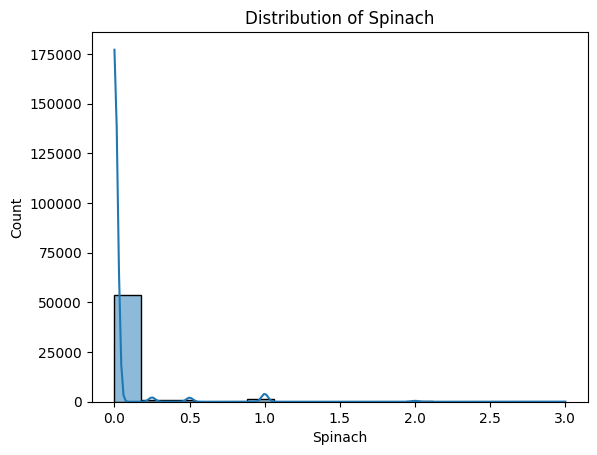

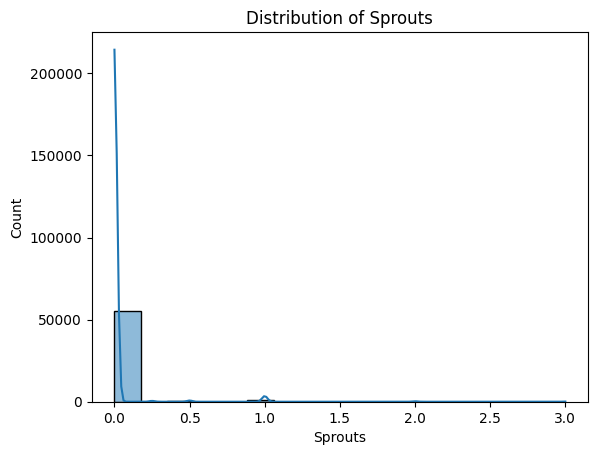

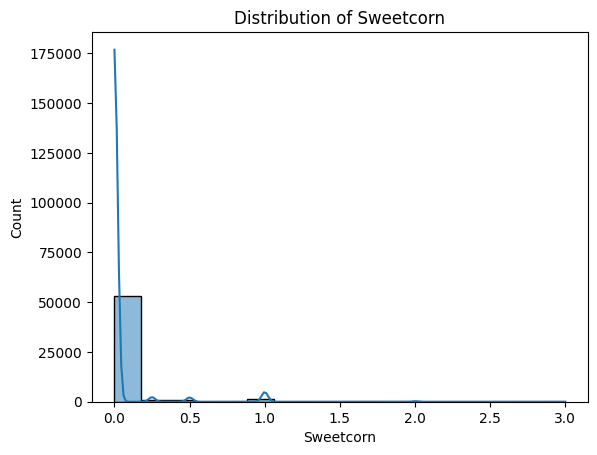

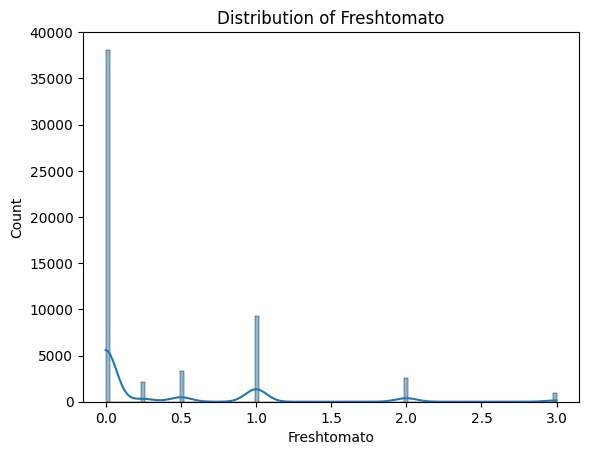

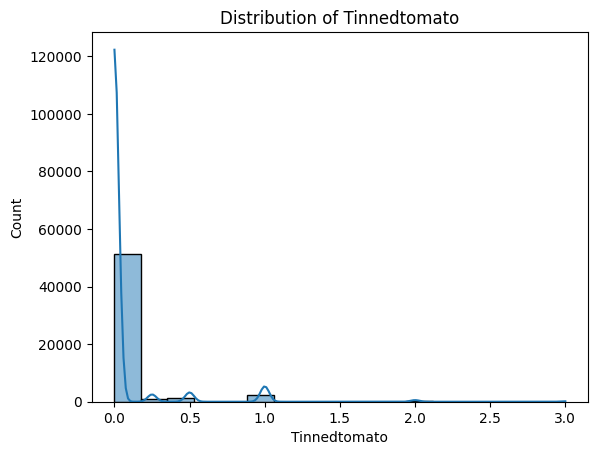

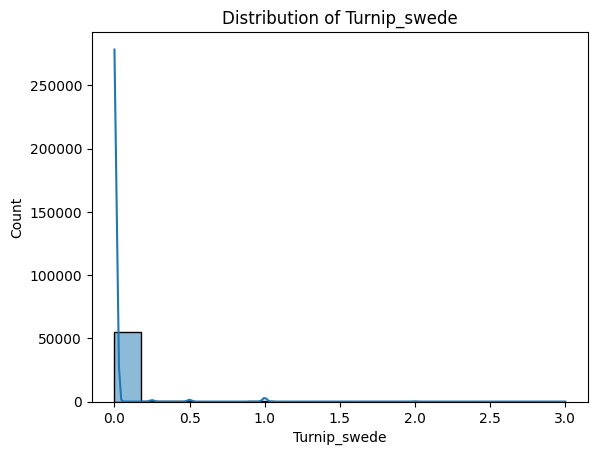

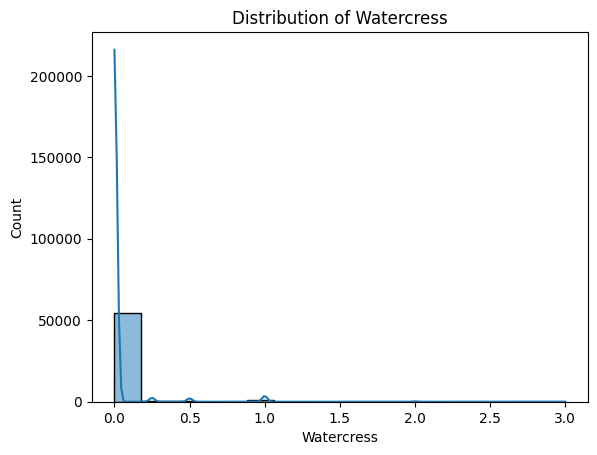

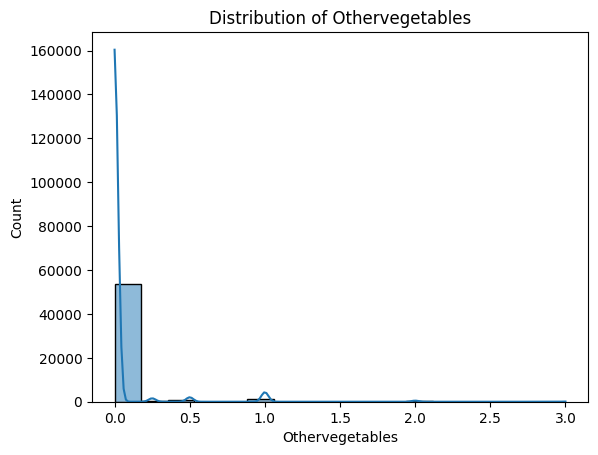

In [5]:
for col in data.select_dtypes(include='number').columns:
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

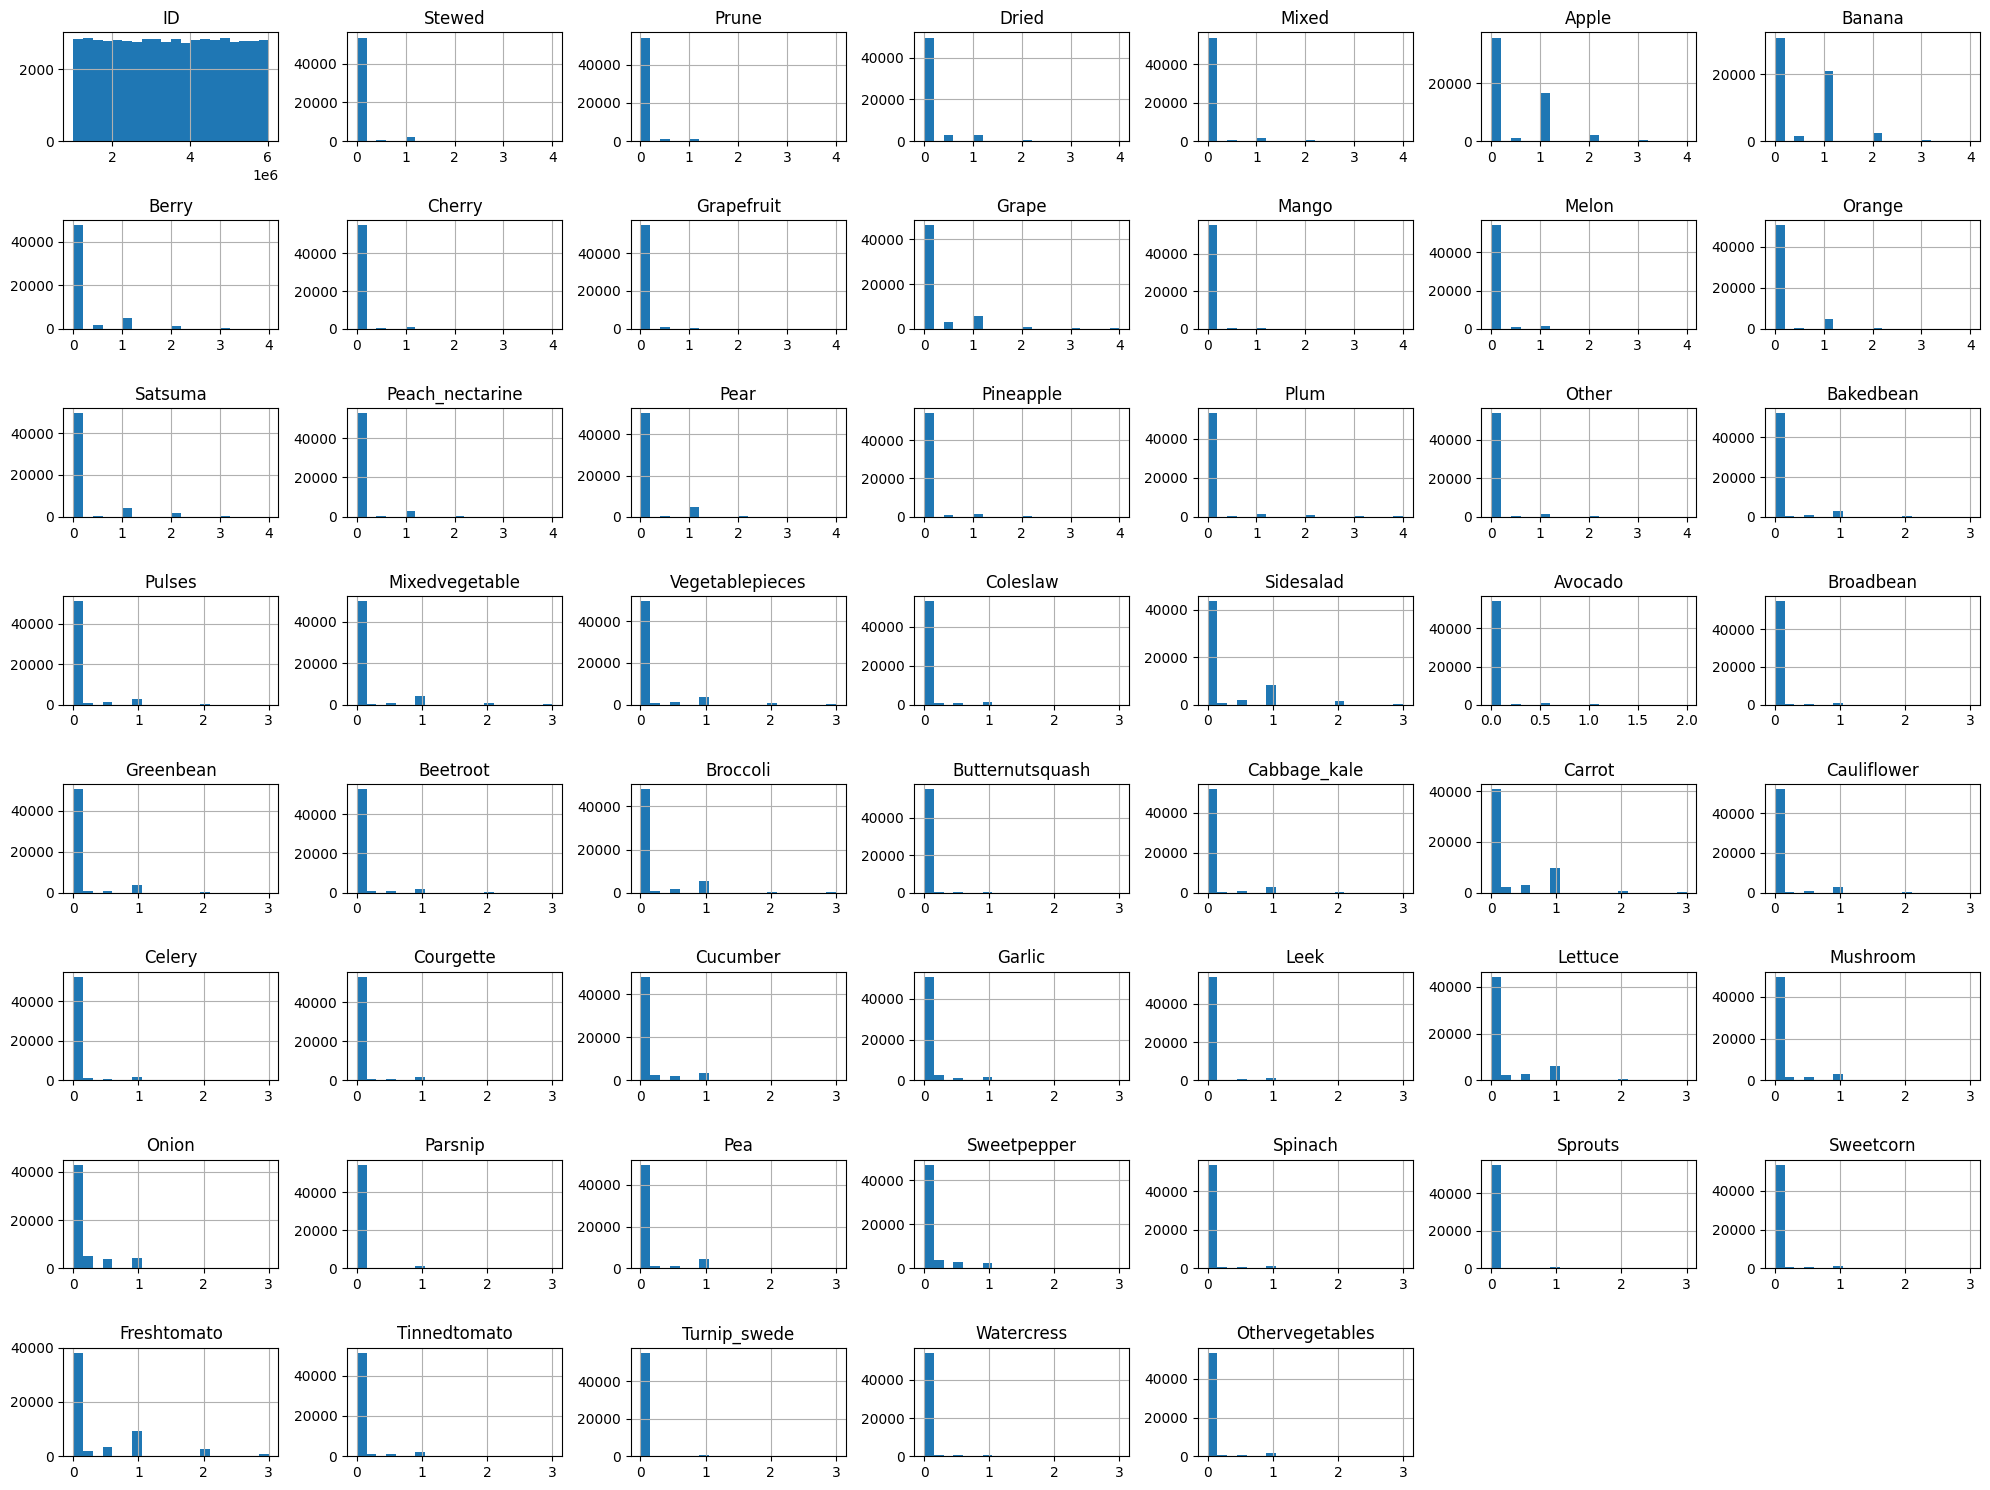

In [ ]:
import matplotlib.pyplot as plt
data.hist(bins=20, figsize=(20, 15))
plt.tight_layout()
plt.show()

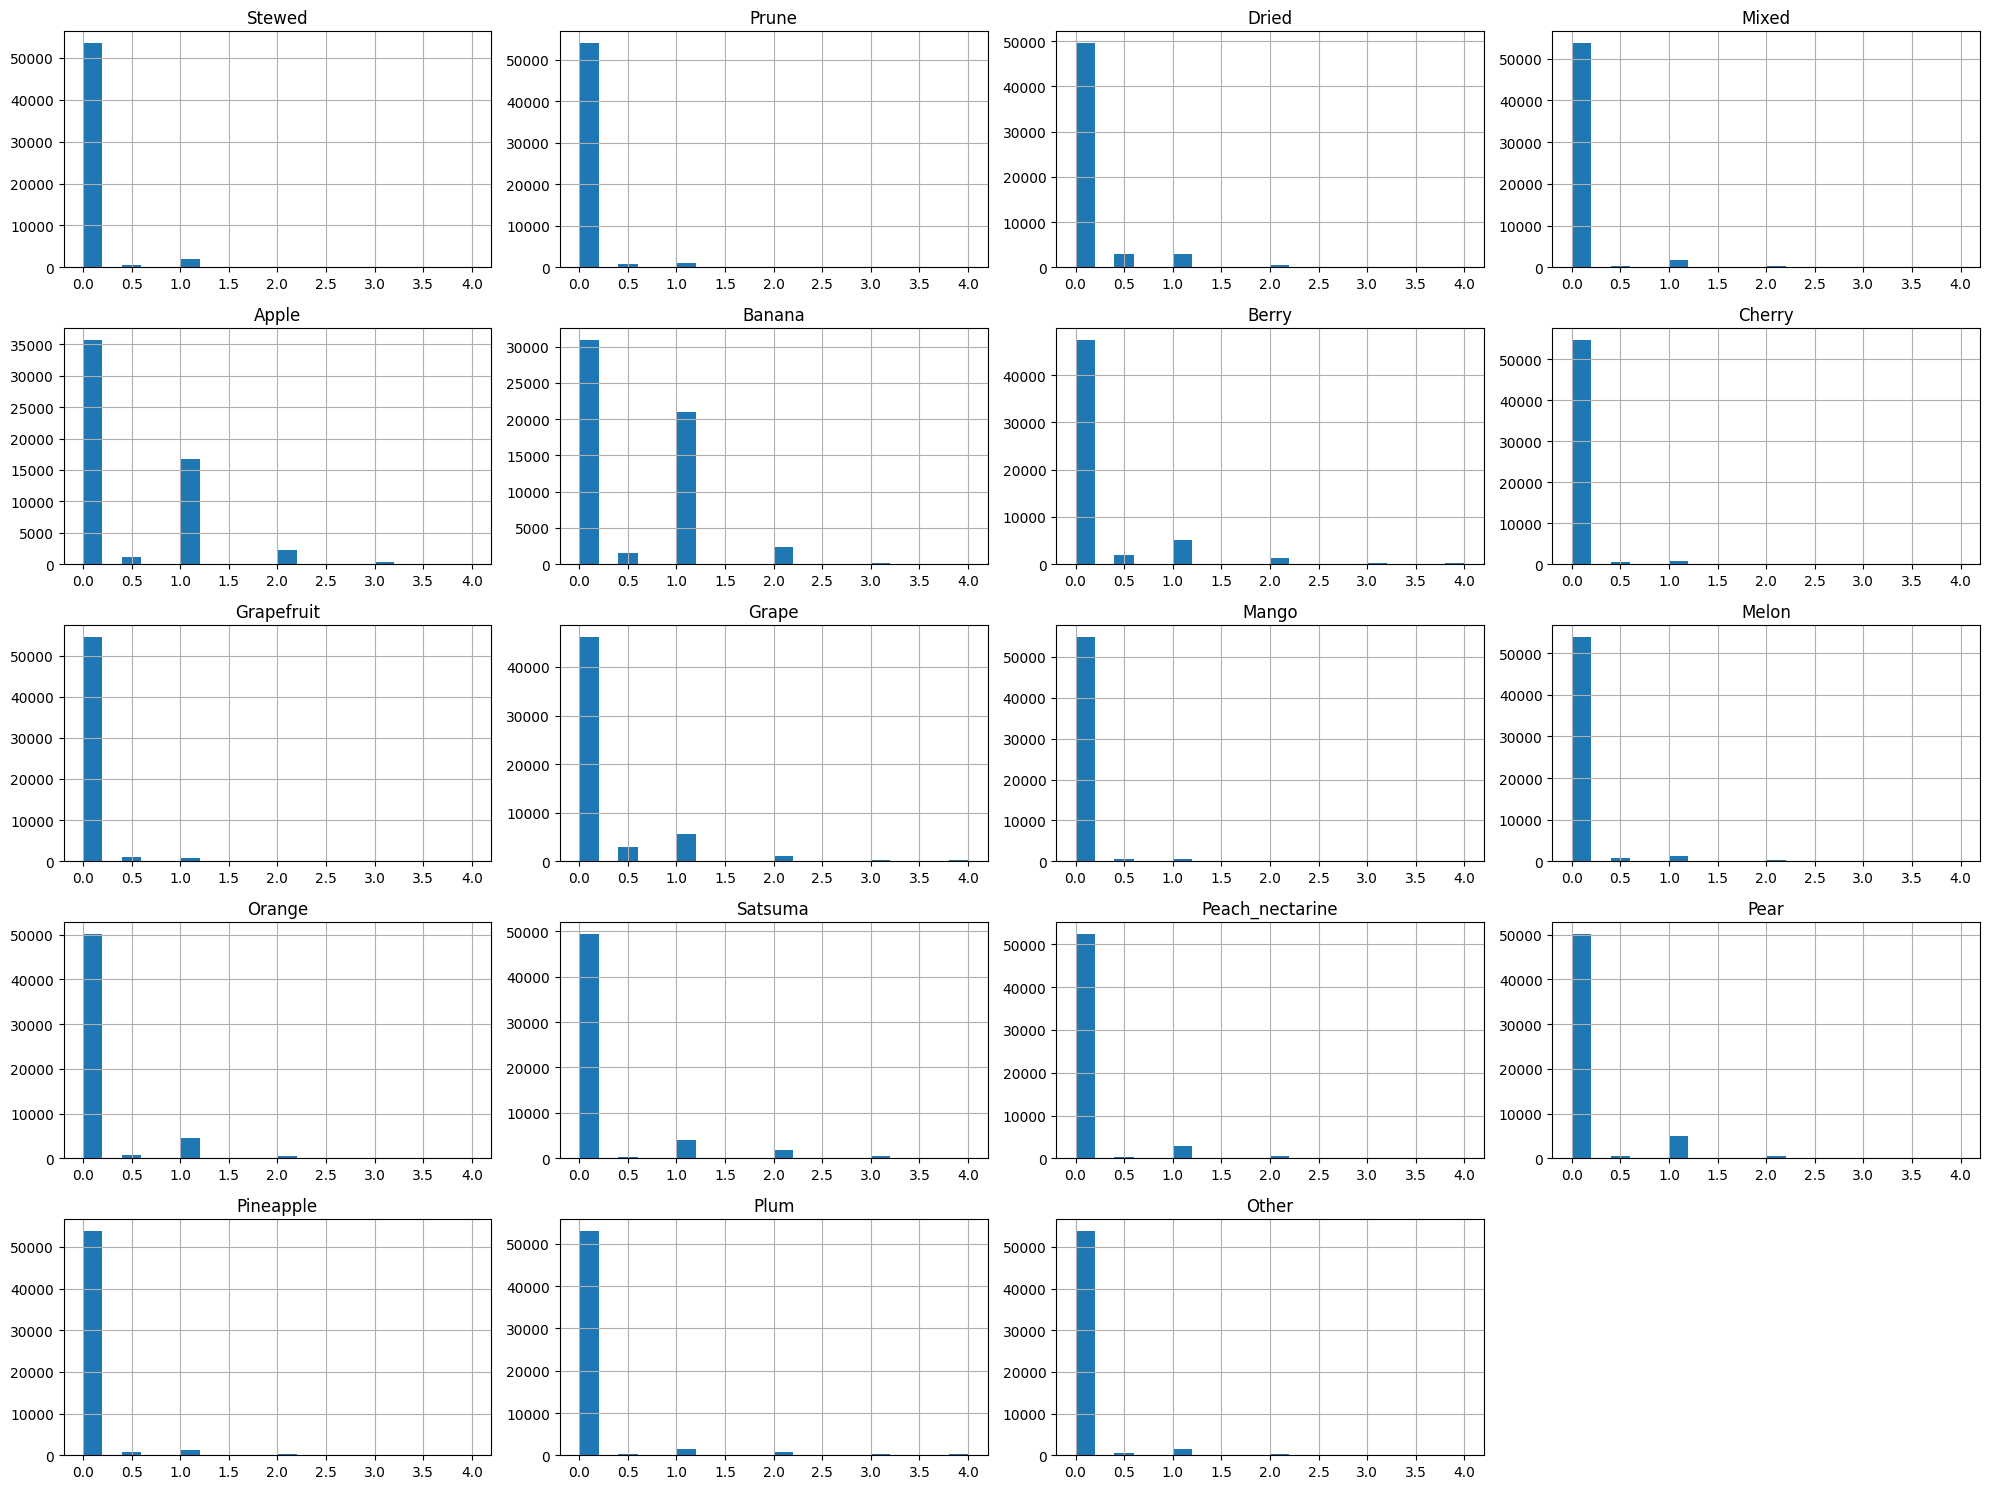

In [34]:
# 繪製水果類分佈圖
fruit_columns = data.iloc[:, 1:20]  # 假設第 1 到第 20 列是水果類
fruit_columns.hist(bins=20, figsize=(20, 15))
plt.xlim(0, 4)  # 設置 X 軸範圍為 [0, 4]
plt.tight_layout()
plt.show()

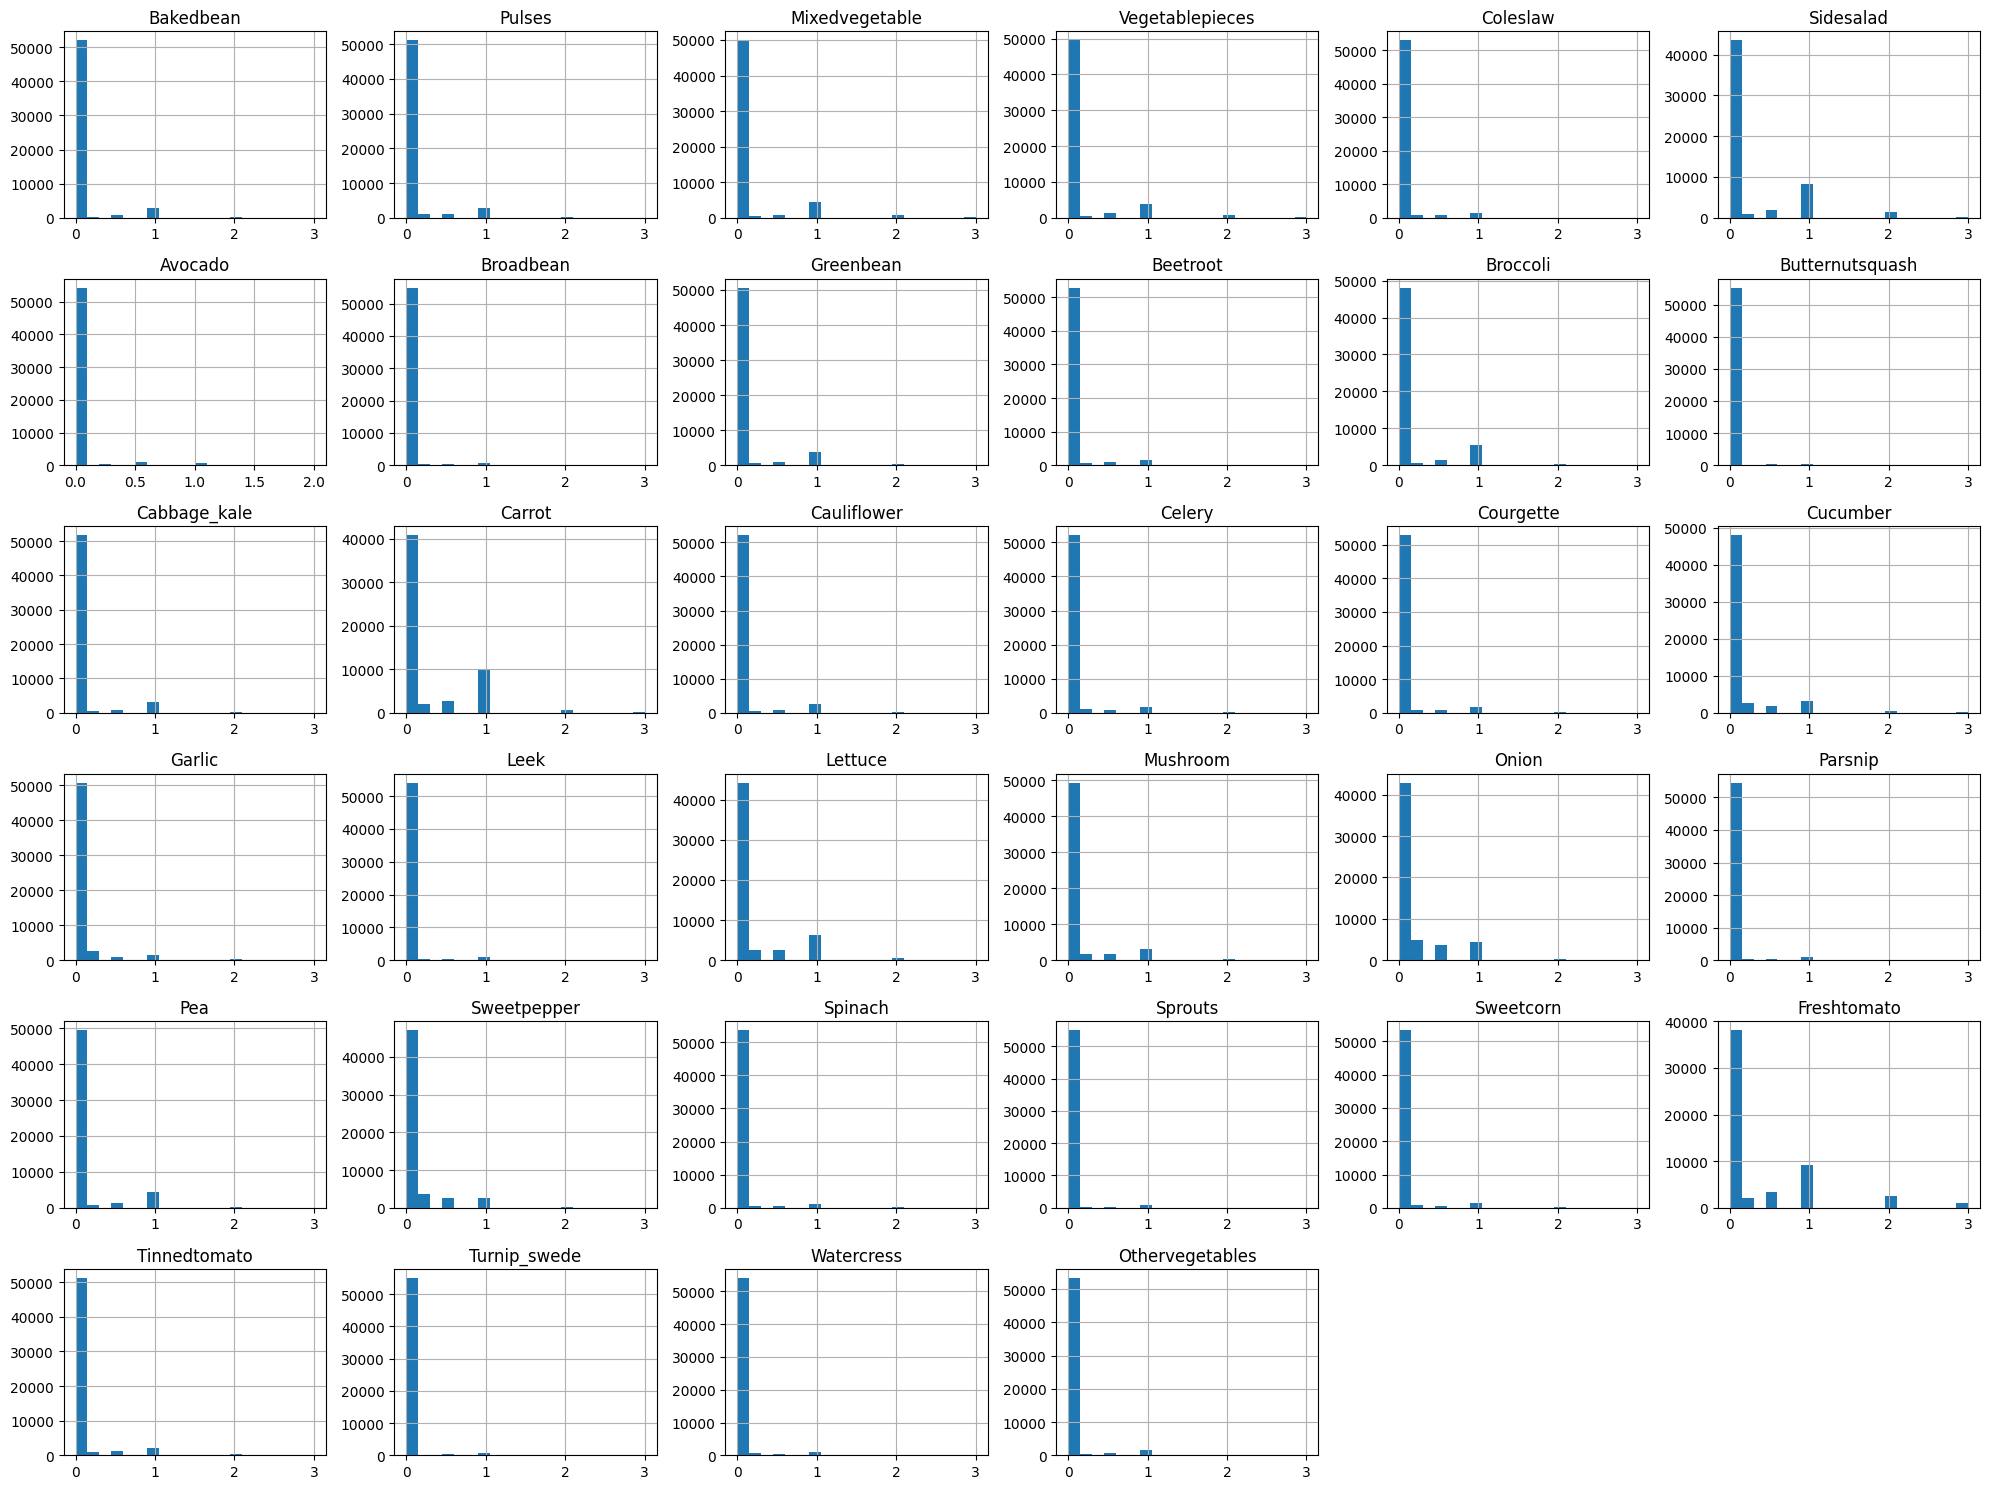

In [35]:
# 繪製蔬菜類分佈圖
vegetable_columns = data.iloc[:, 20:]  # 假設第 21 列以後是蔬菜類
vegetable_columns.hist(bins=20, figsize=(20, 15))
plt.xlim(0, 3)  # 設置 X 軸範圍為 [0, 3]
plt.tight_layout()
plt.show()

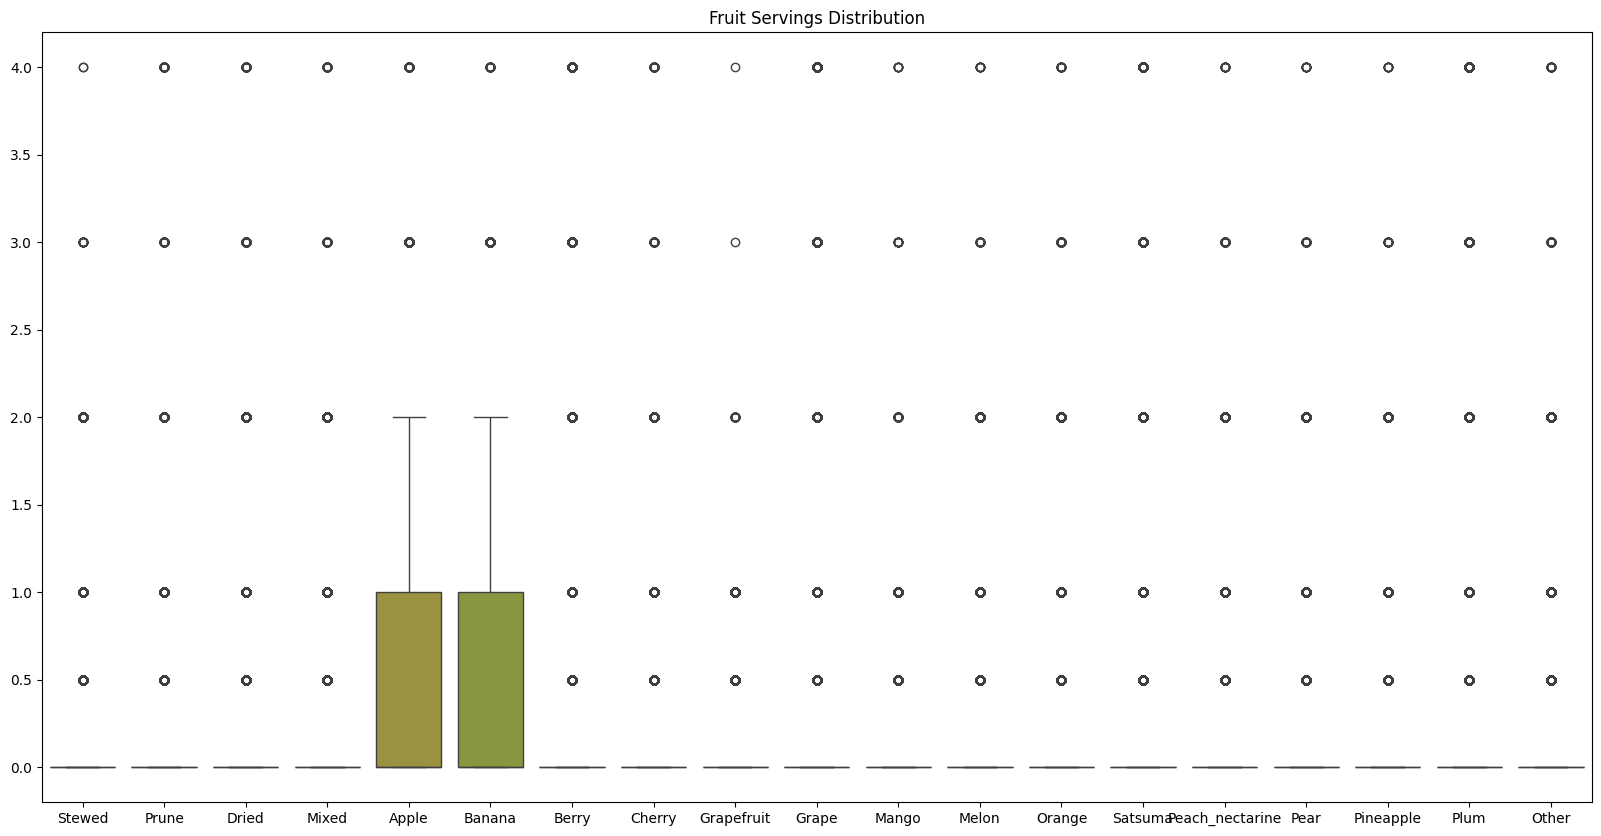

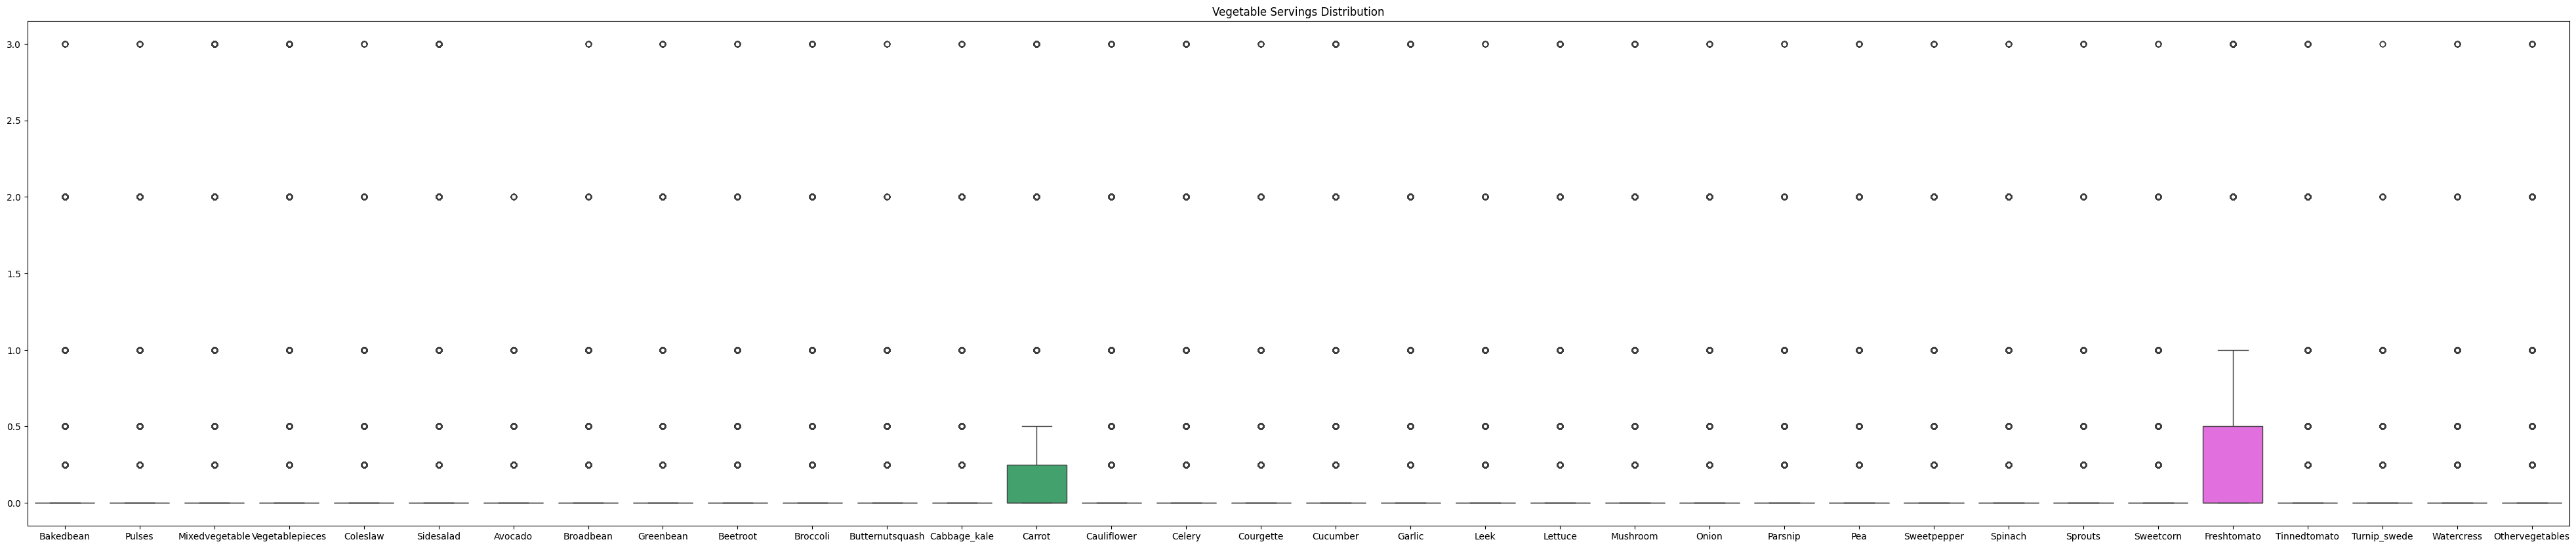

In [36]:
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.boxplot(data=data.iloc[:, 1:20])  # 水果分佈
plt.title("Fruit Servings Distribution")
plt.show()

plt.figure(figsize=(50, 10))
sns.boxplot(data=data.iloc[:, 20:])  # 蔬菜分佈
plt.title("Vegetable Servings Distribution")
plt.show()

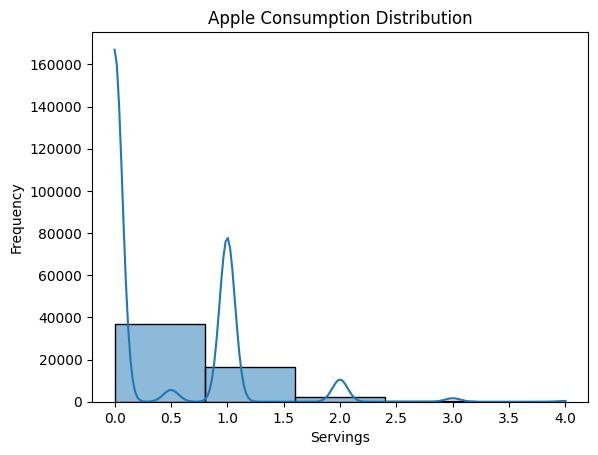

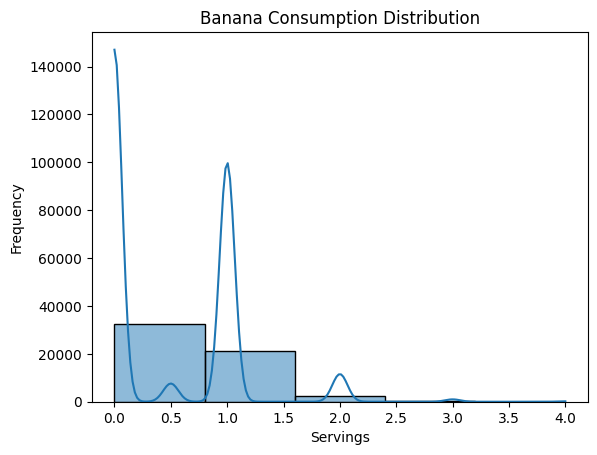

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Apple 的消費量分佈
sns.histplot(data['Apple'], bins=5, kde=True)
plt.title("Apple Consumption Distribution")
plt.xlabel("Servings")
plt.ylabel("Frequency")
plt.show()

# Banana 的消費量分佈
sns.histplot(data['Banana'], bins=5, kde=True)
plt.title("Banana Consumption Distribution")
plt.xlabel("Servings")
plt.ylabel("Frequency")
plt.show()

In [41]:
# 計算相關係數
apple_corr = data.corr()['Apple'].sort_values(ascending=False)
banana_corr = data.corr()['Banana'].sort_values(ascending=False)

print("Apple Correlations:")
print(apple_corr)

Apple Correlations:
Apple              1.000000
Banana             0.140336
Orange             0.115626
Pear               0.089164
Freshtomato        0.070674
Satsuma            0.064716
Carrot             0.061176
Celery             0.059855
Sidesalad          0.056644
Sweetpepper        0.054647
Cucumber           0.052923
Lettuce            0.050191
Dried              0.049661
Onion              0.042327
Grape              0.039575
Beetroot           0.038745
Plum               0.033988
Pulses             0.028578
Broccoli           0.028368
Greenbean          0.028241
Butternutsquash    0.027618
Cabbage_kale       0.025852
Watercress         0.022499
Courgette          0.022094
Spinach            0.021965
Prune              0.021507
Vegetablepieces    0.020894
Stewed             0.020593
Grapefruit         0.020171
Tinnedtomato       0.016692
Garlic             0.016217
Leek               0.015715
Mixedvegetable     0.014605
Avocado            0.013716
Broadbean          0.013258


In [42]:
print("Banana Correlations:")
print(banana_corr)

Banana Correlations:
Banana             1.000000
Apple              0.140336
Grape              0.089334
Pear               0.074774
Satsuma            0.068786
Orange             0.068591
Freshtomato        0.064373
Cucumber           0.054253
Dried              0.053229
Sweetpepper        0.050591
Lettuce            0.048947
Sidesalad          0.048465
Beetroot           0.042363
Onion              0.037929
Plum               0.034676
Celery             0.034346
Mixedvegetable     0.032895
Carrot             0.031217
Berry              0.030739
Prune              0.030518
Avocado            0.025940
Melon              0.024817
Broccoli           0.024401
Watercress         0.023427
Mushroom           0.023195
Peach_nectarine    0.022083
Other              0.021950
Garlic             0.021457
Pineapple          0.019648
Pulses             0.018648
Grapefruit         0.017235
Sweetcorn          0.017022
Vegetablepieces    0.016550
Mango              0.014204
Bakedbean          0.013759

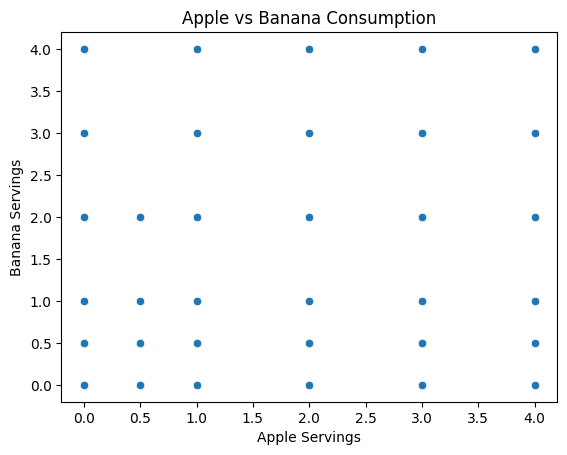

In [43]:
sns.scatterplot(x=data['Apple'], y=data['Banana'])
plt.title("Apple vs Banana Consumption")
plt.xlabel("Apple Servings")
plt.ylabel("Banana Servings")
plt.show()

In [44]:
top_fruits = data.iloc[:, 1:20].sum(axis=0).sort_values(ascending=False)
print("Top Fruits:\n", top_fruits)

top_vegetables = data.iloc[:, 20:].sum(axis=0).sort_values(ascending=False)
print("Top Vegetables:\n", top_vegetables)

Top Fruits:
 Banana             27471.0
Apple              23127.5
Grape              10624.0
Berry              10034.0
Satsuma             9761.0
Orange              6529.0
Pear                6343.0
Dried               5878.0
Plum                4955.0
Peach_nectarine     4168.5
Mixed               2847.5
Other               2643.0
Stewed              2543.5
Pineapple           2191.0
Melon               2190.5
Prune               2096.0
Cherry              1675.5
Grapefruit          1239.0
Mango               1102.5
dtype: float64
Top Vegetables:
 Freshtomato        19488.75
Carrot             13399.50
Sidesalad          12927.25
Lettuce             9801.00
Onion               8139.00
Broccoli            7434.75
Vegetablepieces     6804.00
Mixedvegetable      6748.75
Cucumber            6068.25
Pea                 5794.75
Sweetpepper         5387.50
Mushroom            5296.75
Greenbean           5060.75
Cabbage_kale        4176.75
Pulses              4131.00
Tinnedtomato        38

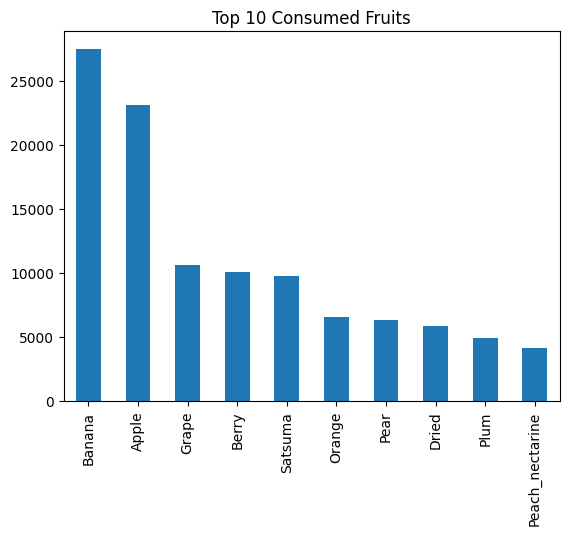

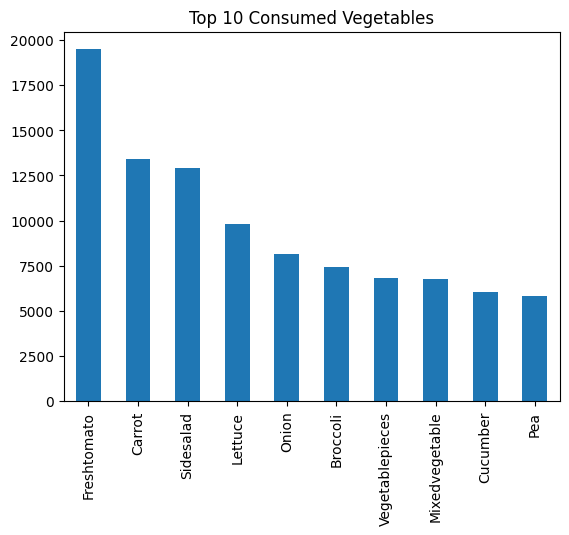

In [45]:
top_fruits.head(10).plot(kind='bar', title="Top 10 Consumed Fruits")
plt.show()

top_vegetables.head(10).plot(kind='bar', title="Top 10 Consumed Vegetables")
plt.show()

In [46]:
data['Fruit_Veg_Ratio'] = data['Total_Fruit'] / (data['Total_Vegetable'] + 1e-9)  # 防止除0錯誤
sns.histplot(data['Fruit_Veg_Ratio'], bins=20, kde=True)
plt.title("Fruit to Vegetable Ratio Distribution")
plt.show()

KeyError: 'Total_Fruit'